#**1) REGRESSION**

Please find the Diamond Price Prediction Data set https://drive.google.com/drive/folders/1qE1tm3Ke3uotTyv6SUqruI09t-AkcwRK?usp=sharing. "description.txt" contains the feature description of data, "diamonds.csv" has the data.

In [1]:
# To read data from diamonds.csv
import pandas as pd
headers = ["carat",	"cut","color","clarity","depth","table","price","x","y","z"]
data = pd.read_csv('diamonds.csv', na_values='?',    
         header=None,  names = headers) 
data = data.reset_index(drop=True)
data = data.iloc[1:]
data.describe()
#print(data) 

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940,53940,53940,53940,53940,53940,53940,53940,53940,53940
unique,273,5,7,8,184,127,11602,554,552,375
top,0.3,Ideal,G,SI1,62,56,605,4.37,4.34,2.7
freq,2604,21551,11292,13065,2239,9881,132,448,437,767




```
# This is formatted as code
```

**KNN Regression [Diamond Price Prediction Dataset]**

1. a) Build a knn regression algorithm [using only python from scratch] to predict the price of diamonds.

In [2]:
#knn regression using scikit learn
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
DiamondpricesData=pd.read_csv('diamonds.csv', encoding='latin')
print('Shape before deleting duplicate values:', DiamondpricesData.shape)

# Removing duplicate rows if any
DiamondpricesData=DiamondpricesData.drop_duplicates()
print('Shape After deleting duplicate values:', DiamondpricesData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
DiamondpricesData.head()

Shape before deleting duplicate values: (53940, 10)
Shape After deleting duplicate values: (53794, 10)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
#Based on the above tests, selecting the final columns for machine learning

SelectedColumns=['carat', 'x','y','z','cut', 'color', 'clarity']

# Selecting final columns
DataforML=DiamondpricesData[SelectedColumns]
DataforML.head()

,carat,x,y,z,cut,color,clarity
0,0.23,3.95,3.98,2.43,Ideal,E,SI2
1,0.21,3.89,3.84,2.31,Premium,E,SI1
2,0.23,4.05,4.07,2.31,Good,E,VS1
3,0.29,4.20,4.23,2.63,Premium,I,VS2
4,0.31,4.34,4.35,2.75,Good,J,SI2


In [5]:
# Saving this final data for reference during deployment
DataforML.to_pickle('ML.pkl')

In [6]:
# Looking at unique values of ordinal column
DataforML['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [7]:
# Replacing the ordinal values
DataforML['cut'].replace({'Good':1, 'Very Good':2,'Fair':3,'Ideal':4,'Premium':5}, inplace=True)

C:\Users\My\miniconda3\envs\py3k\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [8]:
# Looking at unique values of ordinal column
DataforML['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [9]:
# Replacing the ordinal values
DataforML['color'].replace({'J':1, 'I':2,'H':3,'G':4,'F':5,'E':6,'D':7}, inplace=True)

In [10]:
# Looking at unique values of ordinal column
DataforML['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [11]:
# Replacing the ordinal values
DataforML['clarity'].replace({'I1':1,'SI1':2,'SI2':3,'VS1':4,'VS2':5,'VVS1':6,'VVS2':7,'IF':8 }, inplace=True)

In [12]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataforML)

# Adding Target Variable to the data
DataForML_Numeric['price']=DiamondpricesData['price']

# Printing sample rows
DataForML_Numeric.head()

,carat,x,y,z,cut,color,clarity,price
0,0.23,3.95,3.98,2.43,4,6,3,326
1,0.21,3.89,3.84,2.31,5,6,2,326
2,0.23,4.05,4.07,2.31,1,6,4,327
3,0.29,4.20,4.23,2.63,5,2,5,334
4,0.31,4.34,4.35,2.75,1,1,3,335


In [13]:
# Separate Target Variable and Predictor Variables
TargetVariable='price'
Predictors=['carat', 'x', 'y', 'z', 'cut', 'color', 'clarity']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

In [15]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(37655, 7)
(37655,)
(16139, 7)
(16139,)


In [23]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=4,p = 3, metric='euclidean')
#RegModel = KNeighborsRegressor(n_neighbors=4,p = 3, metric='manhattan')
#RegModel = KNeighborsRegressor(n_neighbors=4,p = 3, metric='minkowski')


# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\nModel Validation and Accuracy Calculations')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(metric='euclidean', n_neighbors=4, p=3)
R2 Value: 0.9842269633033539

Model Validation and Accuracy Calculations
   price  Predictedprice
0    650           624.0
1   1349          1409.0
2    650           664.0
3   2375          2275.0
4   2066          2147.0
Mean Accuracy on test data: 92.15917347322126
Median Accuracy on test data: 94.58781890576611

Accuracy values for 10-fold Cross Validation:
 [83.92817831 87.02443801 86.30232318 83.7619977  81.37591572 82.68282178
 84.12704584 82.87730036 83.31686119 84.37686741]

Final Average Accuracy of the model: 83.98


1. b) Do we need to normalise data? [If so Does it make any difference?].


In [ ]:
# give proper explanation
fifference between values are not high, So, normalization will not make any difference.

2. Experiment with different distance measures[Euclidean distance, Manhattan distance, Hamming Distance] to handle categorical attributes.

In [24]:
# show all the experiments
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=4,p = 3, metric='euclidean')
#RegModel = KNeighborsRegressor(n_neighbors=4,p = 3, metric='manhattan')
#RegModel = KNeighborsRegressor(n_neighbors=4,p = 3, metric='minkowski')


# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\nModel Validation and Accuracy Calculations')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))



# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
#RegModel = KNeighborsRegressor(n_neighbors=4,p = 3, metric='euclidean')
RegModel = KNeighborsRegressor(n_neighbors=4,p = 3, metric='manhattan')
#RegModel = KNeighborsRegressor(n_neighbors=4,p = 3, metric='minkowski')


# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\nModel Validation and Accuracy Calculations')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
#RegModel = KNeighborsRegressor(n_neighbors=4,p = 3, metric='euclidean')
#RegModel = KNeighborsRegressor(n_neighbors=4,p = 3, metric='manhattan')
RegModel = KNeighborsRegressor(n_neighbors=4,p = 3, metric='minkowski')


# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\nModel Validation and Accuracy Calculations')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(metric='euclidean', n_neighbors=4, p=3)
R2 Value: 0.9842269633033539

Model Validation and Accuracy Calculations
   price  Predictedprice
0    650           624.0
1   1349          1409.0
2    650           664.0
3   2375          2275.0
4   2066          2147.0
Mean Accuracy on test data: 92.15917347322126
Median Accuracy on test data: 94.58781890576611

Accuracy values for 10-fold Cross Validation:
 [83.92817831 87.02443801 86.30232318 83.7619977  81.37591572 82.68282178
 84.12704584 82.87730036 83.31686119 84.37686741]

Final Average Accuracy of the model: 83.98
KNeighborsRegressor(metric='manhattan', n_neighbors=4, p=3)
R2 Value: 0.9848360474048655

Model Validation and Accuracy Calculations
   price  Predictedprice
0    650           578.0
1   1349          1410.0
2    650           658.0
3   2375          2275.0
4   2066          2147.0
Mean Accuracy on test data: 92.12602604908857
Median Accuracy on test data: 94.52415112386419

Accuracy values for 10-fold Cr

3. Report Mean Squared Error(MSE), Mean-Absolute-Error(MAE), R-squared (R2) score in a tabular form.

In [38]:
# MSE, MAE, R2, RMSE Method One
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import r2_score #r2_score
y_predict=RegModel.predict(X_test)
print('MSE=',mean_squared_error(y_test,y_predict))
print('MAE=',mean_absolute_error(y_test,y_predict))
print('RMSE=',np.sqrt(mean_squared_error(y_test,y_predict)))  
print("r2_score=",r2_score(y_test,y_predict))



MSE= 445971.3087358263
MAE= 326.0857704938348
RMSE= 667.8108330476725
r2_score= 0.9709603903218518


4.  a) Choose different K values (k=2,3,5,7,11,16) and experiment. Plot a graph showing R2 score vs k.

In [14]:
# plot
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=2,p = 3, metric='euclidean')
# Printing all the parameters of KNN
print(RegModel)
# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# plot
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3,p = 3, metric='euclidean')
# Printing all the parameters of KNN
print(RegModel)
# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))
# plot
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=5,p = 3, metric='euclidean')
# Printing all the parameters of KNN
print(RegModel)
# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))
# plot
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=7,p = 3, metric='euclidean')
# Printing all the parameters of KNN
print(RegModel)
# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))
# plot
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=11,p = 3, metric='euclidean')
# Printing all the parameters of KNN
print(RegModel)
# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))
# plot
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=16,p = 3, metric='euclidean')
# Printing all the parameters of KNN
print(RegModel)
# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))






KNeighborsRegressor(metric='euclidean', n_neighbors=2, p=3)
R2 Value: 0.9907683235065406
KNeighborsRegressor(metric='euclidean', n_neighbors=3, p=3)
R2 Value: 0.9867385214997301
KNeighborsRegressor(metric='euclidean', p=3)
R2 Value: 0.9823776320403943
KNeighborsRegressor(metric='euclidean', n_neighbors=7, p=3)
R2 Value: 0.9798384091381005
KNeighborsRegressor(metric='euclidean', n_neighbors=11, p=3)
R2 Value: 0.9760755221677877
KNeighborsRegressor(metric='euclidean', n_neighbors=16, p=3)
R2 Value: 0.9725012875756414


4. b) Are the R-squared scores the same? Why / Why not? How do we identify the best K? Suggest a computational procedure, with a logical explanation.

In [ ]:
# Explanation

5. a) Also, report the performance of scikit-learn’s kNN regression algorithm.  

In [15]:
# scikit-learn KNN Regressor
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=4,p = 3, metric='euclidean')
#RegModel = KNeighborsRegressor(n_neighbors=4,p = 3, metric='manhattan')
#RegModel = KNeighborsRegressor(n_neighbors=4,p = 3, metric='minkowski')

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)
from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))
print('\nModel Validation and Accuracy Calculations')
# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)
# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())
# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])
MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])
Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(metric='euclidean', n_neighbors=4, p=3)
R2 Value: 0.9842269633033539

Model Validation and Accuracy Calculations
   price  Predictedprice
0    650           624.0
1   1349          1409.0
2    650           664.0
3   2375          2275.0
4   2066          2147.0
Mean Accuracy on test data: 92.15917347322126
Median Accuracy on test data: 94.58781890576611

Accuracy values for 10-fold Cross Validation:
 [83.92817831 87.02443801 86.30232318 83.7619977  81.37591572 82.68282178
 84.12704584 82.87730036 83.31686119 84.37686741]

Final Average Accuracy of the model: 83.98


5. b) Compare it with the algorithm you built. [ you can use complexities, R2 score etc..]

In [ ]:
# Comparison
R2 score and complexities are more or less same.

6. From the above experiments, what do you think are advantages and disadvantages of the knn regression algorithm?


In [ ]:
# report this  along with the experiments
Advantage:
    
1. Simple to implement and intuitive to understand
2. Does not take Training Time for regression : The KNN algorithm has no explicit training step and all the work happens during prediction
3. There is a single hyperparameter, the value of K. This makes hyper parameter tuning easy.
4. Choice of distance metric: There are many distance metrics to chose from. Some popular distance metrics used are Euclidean, Manhattan, Minkowski, hamming distance eand so on.
    
Disadvantage:
1. This algorithm is  Not good for large datasets, since the entire training data is processed for every prediction. Time complexity for each prediction is O(MNlog(k)) where M is the dimension of the data, N is the size or the number of instances in the training data. Note that there are specialized ways of organizing data to address this issue and make KNN faster.
2. The prediction compleixty in supervised learning gets higher for higher dimensional data (see the dependence of time complexity from the previous point on the dimension d).
3. Since KNN expects points to be close in ALL dimensions, it might not consider points that are really close in sevaral dimensions, though farther away in a few favourably. This can be adjusted by chosing an appropriate distance measure. Moreover, this means it is sensitive if different features have different ranges. This can be addressed by appropriate pre-processing to scale features.
    

# **2)** **Linear Regression**

Dataset - same as above (Diamond Price Detection)


2a) Implement a Linear Regression model (from the scratch) taking suitable independent variables from the dataset. 

Report and Calculate the error obtained.


In [21]:
#initializing our inputs and outputs
X = DataForML_Numeric['carat'].values
Y = DataForML_Numeric['price'].values

#mean of our inputs and outputs
x_mean = np.mean(X)
y_mean = np.mean(Y)

#total number of values
n = len(X)

#using the formula to calculate the b1 and b0
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)

#printing the coefficient
print(b1, b0)

7763.658553919855 -2260.6268263215716


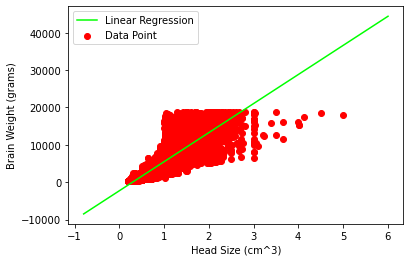

In [23]:
import matplotlib.pyplot as plt
#plotting values 
x_max = np.max(X) + 1
x_min = np.min(X) - 1

#calculating line values of x and y
x = np.linspace(x_min, x_max, 1000)
y = b0 + b1 * x

#plotting line 
plt.plot(x, y, color='#00ff00', label='Linear Regression')

#plot the data point
plt.scatter(X, Y, color='#ff0000', label='Data Point')

# x-axis label
plt.xlabel('Head Size (cm^3)')

#y-axis label
plt.ylabel('Brain Weight (grams)')

plt.legend()
plt.show()

In [24]:
rmse = 0
for i in range(n):
    y_pred=  b0 + b1* X[i]
    rmse += (Y[i] - y_pred) ** 2
    
rmse = np.sqrt(rmse/n)

print(rmse)

1548.425635616103


In [25]:
sumofsquares = 0
sumofresiduals = 0

for i in range(n) :
    y_pred = b0 + b1 * X[i]
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) **2
    
score  = 1 - (sumofresiduals/sumofsquares)

print(score)

0.8492513086807058


2b) What are the best suitable features you used to predict the price of the dataset and Why?

Idea: Use Correlation to get the suitable features and Report the values accordingly.

In [60]:
#code for Correlation between features and the Diamond Price.
DataForML.corr()

,carat,x,y,z,cut,color,clarity
carat,1.000000,0.975380,0.951908,0.953542,-0.000931,-0.291019,-0.281645
x,0.975380,1.000000,0.974592,0.970686,0.009299,-0.269876,-0.301868
y,0.951908,0.974592,1.000000,0.951844,-0.004269,-0.263153,-0.290789
z,0.953542,0.970686,0.951844,1.000000,-0.023522,-0.267825,-0.299688
cut,-0.000931,0.009299,-0.004269,-0.023522,1.000000,-0.016540,0.052833
color,-0.291019,-0.269876,-0.263153,-0.267825,-0.016540,1.000000,0.001791
clarity,-0.281645,-0.301868,-0.290789,-0.299688,0.052833,0.001791,1.000000


Explanation for 2b) - 

2c) Use the module Linear Regression from sklearn to predict the price of diamonds(considering the same attributes as before) and compare the result obtained with the above. 


In [20]:
# import sklearn model

# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['price']-TestingDataResults['Predictedprice']))/TestingDataResults['price'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.8925231685362064

##### Model Validation and Accuracy Calculations ##########
   price  Predictedprice
0   1435          2278.0
1   3584          4648.0
2   1851          1794.0
3   1590          2356.0
4   5690          5630.0
Mean Accuracy on test data: 60.11418475743294
Median Accuracy on test data: 77.3502947564381

Accuracy values for 10-fold Cross Validation:
 [58.89238164 68.36106979 78.25276291 75.67316187 74.81757154 16.51393228
 31.95324515 40.59995206 54.40277812 63.57359152]

Final Average Accuracy of the model: 56.3


2d) Now, using the whole dataset, predict the price of the Diamonds using the module of Linear Regression from sklearn. Report the changes you have observed compared to before? Adding extra features did it make the prediction better or worse.Comment? 


2e) Now, compare the algorithms KNN regression and Linear Regression. What are the differences you have observed? Which is better and why. Your statements should be backed up with statistics. 


Explanation - KNN regression is better because average accuracy is 84 prsent but for linear regression average accuracy is 53 persent.

2f) Plot the predicted values from KNN regression, Linear Regression and Actual Diamond Price.


In [ ]:
#plot 

#**KNN Classifier**

In this problem you are required to train, test and validate a K-Nearest Neighbor Classifier on the famous CIFAR-10 dataset. The next few cells will guide you through the process. Follow along...

In [2]:
# Run some setup code for this notebook.

import random
import numpy as np
import matplotlib.pyplot as plt
import os


from __future__ import print_function

from builtins import range
from six.moves import cPickle as pickle
from imageio import imread
import platform

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%reload_ext autoreload
%autoreload 2

In [5]:
# This cell loads the training and testing dataset. Please note the variables at
# the end of the cell as you would require them to access the train/test data 
# and labels throughout the assignment
def load_pickle(f):
    version = platform.python_version_tuple()
    if version[0] == '2':
        return  pickle.load(f)
    elif version[0] == '3':
        return  pickle.load(f, encoding='latin1')
    raise ValueError("invalid python version: {}".format(version))
  
def load_CIFAR_batch(data_batch_1):
    """ load single batch of cifar """
    with open(data_batch_1, 'rb') as f:
        datadict = load_pickle(f)
        X = datadict['data']
        Y = datadict['labels']
        X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("float")
        Y = np.array(Y)
        return X, Y

def load_CIFAR10(ROOT):
    """ load all of cifar """
    xs = []
    ys = []
    for b in range(1,6):
        f = os.path.join(ROOT, 'data_batch_%d' % (b, ))
        X, Y = load_CIFAR_batch(f)
        xs.append(X)
        ys.append(Y)
    Xtr = np.concatenate(xs)
    Ytr = np.concatenate(ys)
    del X, Y
    Xte, Yte = load_CIFAR_batch(os.path.join(ROOT, 'test_batch'))
    return Xtr, Ytr, Xte, Yte


cifar10_dir = 'cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [4]:
# Download the dataset
!wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz -O cifar-10-python.tar.gz
!tar -xzvf cifar-10-python.tar.gz
!rm cifar-10-python.tar.gz

'wget' is not recognized as an internal or external command,
operable program or batch file.
'tar' is not recognized as an internal or external command,
operable program or batch file.
'rm' is not recognized as an internal or external command,
operable program or batch file.


Next we visualize the CIFAR-10 dataset. Although these functions are being written for you, we highly recommend you go through the code and make yourself familiar as these are things you will be required to do very often when working on AI/ML projects

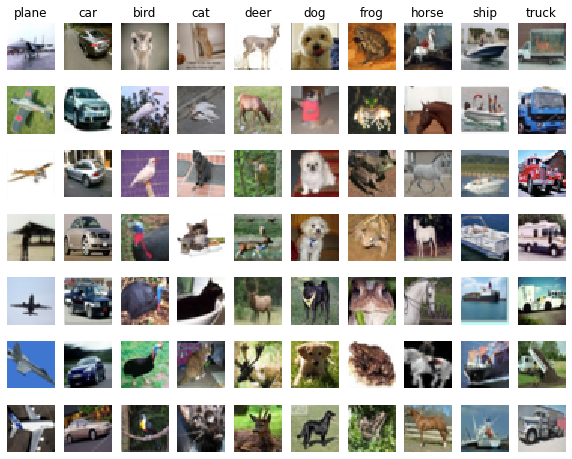

In [6]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In the next cell we flatten each image into a single dimensional vector so that it is easy to process. You should be able to reason about the dimensions comfortable.

In [8]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In the next cell you are going to implement the main KNearestNeighbor class and keep adding functions to it as and when required in the subsequent steps.

In [30]:
import numpy as np
# You will keep coming back to this cell to add more functions as and when
# required. Right now it is very simple!
class KNearestNeighbor(object):
    """ a kNN classifier with L2 distance """

    def __init__(self):
        pass
    
    def train(self, X, y):
    
        self.X_train = X
        self.y_train = y
    
    def predict(self, X, k=1, num_loops=0):
    
    
        if num_loops == 0:
            dists = self.compute_distances_no_loops(X)
        elif num_loops == 1:
            dists = self.compute_distances_one_loop(X)
        elif num_loops == 2:
            dists = self.compute_distances_two_loops(X)
        else:
            raise ValueError('Invalid value %d for num_loops' % num_loops)

        return self.predict_labels(dists, k=k)

    def compute_distances_two_loops(self, X):
   
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        print (X.shape, self.X_train.shape)
        for i in range(num_test):
            for j in range(num_train):

        
                dists[i, j] = np.sqrt(np.sum((X[i, :] - self.X_train[j, :]) ** 2))
        
        return dists

    def compute_distances_one_loop(self, X):
    
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        for i in range(num_test):
      
            dists[i, :] = np.sqrt(np.sum(np.square(self.X_train - X[i, :]), axis=1)) # broadcasting
      
        return dists

    def compute_distances_no_loops(self, X):
    
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train)) 

    
        test_sum = np.sum(np.square(X), axis=1) # num_test x 1
        train_sum = np.sum(np.square(self.X_train), axis=1) # num_train x 1
        inner_product = np.dot(X, self.X_train.T) # num_test x num_train
        dists = np.sqrt(-2 * inner_product + test_sum.reshape(-1, 1) + train_sum) # broadcast
    
        return dists

    def predict_labels(self, dists, k=1):
    
        num_test = dists.shape[0]
        y_pred = np.zeros(num_test)
        for i in range(num_test):
      # A list of length k storing the labels of the k nearest neighbors to
      # the ith test point.
             closest_y = []
      
             y_indicies = np.argsort(dists[i, :], axis = 0)
             closest_y = self.y_train[y_indicies[:k]]
      
             y_pred[i] = np.argmax(np.bincount(closest_y))
      
      

        return y_pred


Go back to KNearestNeighbor class and add a method to train the classifier. Your function will be called as below. In KNN classifier, this step is a simple memorization of the training data.

In [31]:
# Make sure to add train() in the classifier class before executing this cell
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

Go back to KNearestNeighbor class and add a method to compute distances between each pair of test image and train image. You can use two loops to do this. Remember we are using standard L-2 distance metric. Precisely your method should return a distance matrix($D$) where $D(i,j)$ = **L-2** distance between the $i^{th}$ test image and the $j^{th}$ train image. Your function will be called as below

In [67]:
# Make sure to add compute_distances_two_loops() in the classifier class 
# before executing this cell
dists = classifier.compute_distances_two_loops(X_test)
print(dists.shape)

(500, 3072) (5000, 3072)
(500, 5000)


Next implement the function to predict labels. Again go back to the KNearestNeighbor class cell. Your function will be called as below

In [68]:
# Make sure to add predict_labels() in the classifier class 
# before executing this cell
y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 137 / 500 correct => accuracy: 0.274000


In [71]:
# Use this cell to compute accuracies for k = 3, 5, 7
# Make sure to add predict_labels() in the classifier class 
# before executing this cell
y_test_pred = classifier.predict_labels(dists, k=5)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 139 / 500 correct => accuracy: 0.278000


Now we have a basic classifier ready but it is extremely inefficient. In Machine Learning writing vectorised code is one of the most important skills. 

Now you have to again go back to the KNearestNeighbor class cell and add functions to compute the distance matrix using:
1.   single loop
2.   no loops

From here onwards we won't do as much hand holding as done before. You are expected to write all the code from scratch



In [72]:
# Use this cell to call the functions

dists_one = classifier.compute_distances_one_loop(X_test)


difference = np.linalg.norm(dists - dists_one, ord='fro')
print('Difference was: %f' % (difference, ))
if difference < 0.001:
    print('Good! The distance matrices are the same')
else:
    print('Uh-oh! The distance matrices are different')

Difference was: 0.000000
Good! The distance matrices are the same


Next, you are required to tabulate the time taken to compute the distance matrix using each of the three above methods implemented for k = 1, 3, 5, 7.

In [73]:
# Use this cell to present your timing results for computing distance matrix

# Let's compare how fast the implementations are
def time_function(f, *args):
    """
    Call a function f with args and return the time (in seconds) that it took to execute.
    """
    import time
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc - tic

two_loop_time = time_function(classifier.compute_distances_two_loops, X_test)
print('Two loop version took %f seconds' % two_loop_time)

one_loop_time = time_function(classifier.compute_distances_one_loop, X_test)
print('One loop version took %f seconds' % one_loop_time)

no_loop_time = time_function(classifier.compute_distances_no_loops, X_test)
print('No loop version took %f seconds' % no_loop_time)

# you should see significantly faster performance with the fully vectorized implementation

(500, 3072) (5000, 3072)
Two loop version took 121.211933 seconds
One loop version took 116.673203 seconds
No loop version took 1.169067 seconds


As you can see that in KNN algorithm it is important to tune the hyperparameter K. We will do this using Cross Validation Leave One Out approach. The idea is to split the train set into few folds(here we recommend you to set the fold number to 5). Then, for each value of K, we leave one of these folds out to evaluate performance but use the others to train. Repeat this by leaving each fold out once. You will get 5 accuracies in this case, one for leaving out each fold. Depending on the average accuracy decide on the optimal value of K. Report the same. We also expect you to present plots showing the average accuracy and standard deviation for each value of K.

In [32]:
# Use this cell to implement Cross Validation
num_folds = 5
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]

X_train_folds = []
y_train_folds = []

pass

k_to_accuracies = {}



pass

# Print out the computed accuracies
for k in sorted(k_to_accuracies):
    for accuracy in k_to_accuracies[k]:
        print('k = %d, accuracy = %f' % (k, accuracy))

In [33]:
# Based on the cross-validation results above, choose the best value for k,   

best_k = 1

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)
y_test_pred = classifier.predict(X_test, k=best_k)

# Compute and display the accuracy
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

MemoryError: Unable to allocate 4.53 GiB for an array with shape (16139, 37655) and data type float64

In this last part of the notebook you are expected to do the following and present appropriate reports/results:

1. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels in all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
2. Try subtracting the mean from each pixel in each image. This mean is computed across all pixels at that position from all images. Report accuracies on the test set for k = 1,3,5,7. Is there any change in the accuracy? Why?
3. What is the time complexity of training using KNN classifier? What is the time complexity while testing? Is KNN a linear classifier or can it learn any boundary?
4. Bonus: Explore what image features you can use to better the performance of KNN classifier.




# **Decision Trees**

The Wisconsin Breast Cancer Dataset(WBCD) can be found here(https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)

This dataset describes the characteristics of the cell nuclei of various patients with and without breast cancer. The task is to classify a decision tree to predict if a patient has a benign or a malignant tumour based on these features.

Attribute Information:
```
#  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
```


In [1]:
import pandas as pd
headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('breast-cancer-wisconsin.data', na_values='?',    
         header=None, index_col=['ID'], names = headers) 
data = data.reset_index(drop=True)
data = data.fillna(0)
data.describe()

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


1. a) Implement a decision tree(from scratch using only python data structures) as a class.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import random
from pprint import pprint

In [3]:
%matplotlib inline
sns.set_style("darkgrid")

In [4]:
cancer = pd.read_csv('breast-cancer-wisconsin.data', na_values='?',    
         header=None, index_col=['ID'], names = headers) ;
cancer.head()

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
ID,,,,,,,,,,
1000025,5,1,1,1,2,1.0,3,1,1,2
1002945,5,4,4,5,7,10.0,3,2,1,2
1015425,3,1,1,1,2,2.0,3,1,1,2
1016277,6,8,8,1,3,4.0,3,7,1,2
1017023,4,1,1,3,2,1.0,3,1,1,2


In [5]:
def train_test_split(cancer, test_size):
    
    if isinstance(test_size, float):
        test_size = round(test_size * len(cancer))

    indices = cancer.index.tolist()
    test_indices = random.sample(population=indices, k=test_size)

    test_cancer = cancer.loc[test_indices]
    train_cancer = cancer.drop(test_indices)
    
    return train_cancer, test_cancer

In [6]:
random.seed(0)
train_cancer, test_cancer = train_test_split(cancer, test_size=20)

In [7]:
data = train_cancer.values
data[:5]

array([[ 5.,  1.,  1.,  1.,  2.,  1.,  3.,  1.,  1.,  2.],
       [ 5.,  4.,  4.,  5.,  7., 10.,  3.,  2.,  1.,  2.],
       [ 3.,  1.,  1.,  1.,  2.,  2.,  3.,  1.,  1.,  2.],
       [ 6.,  8.,  8.,  1.,  3.,  4.,  3.,  7.,  1.,  2.],
       [ 4.,  1.,  1.,  3.,  2.,  1.,  3.,  1.,  1.,  2.]])

In [8]:
def check_purity(data):
    
    label_column = data[:, -1]
    unique_classes = np.unique(label_column)

    if len(unique_classes) == 1:
        return True
    else:
        return False

In [9]:
def classify_data(data):
    
    label_column = data[:, -1]
    unique_classes, counts_unique_classes = np.unique(label_column, return_counts=True)

    index = counts_unique_classes.argmax()
    classification = unique_classes[index]
    
    return classification

In [10]:
def get_potential_splits(data):
    
    potential_splits = {}
    _, n_columns = data.shape
    for column_index in range(n_columns - 1):        # excluding the last column which is the label
        potential_splits[column_index] = []
        values = data[:, column_index]
        unique_values = np.unique(values)

        for index in range(len(unique_values)):
            if index != 0:
                current_value = unique_values[index]
                previous_value = unique_values[index - 1]
                potential_split = (current_value + previous_value) / 2
                
                potential_splits[column_index].append(potential_split)
    
    return potential_splits

In [11]:
def split_data(data, split_column, split_value):
    
    split_column_values = data[:, split_column]

    data_below = data[split_column_values <= split_value]
    data_above = data[split_column_values >  split_value]
    
    return data_below, data_above

In [12]:
def calculate_entropy(data):
    
    label_column = data[:, -1]
    _, counts = np.unique(label_column, return_counts=True)

    probabilities = counts / counts.sum()
    entropy = sum(probabilities * -np.log2(probabilities))
     
    return entropy

In [ ]:
def calculate_overall_entropy(data_below, data_above):
    
    n = len(data_below) + len(data_above)
    p_data_below = len(data_below) / n
    p_data_above = len(data_above) / n

    overall_entropy =  (p_data_below * calculate_entropy(data_below) 
                      + p_data_above * calculate_entropy(data_above))
    
    return overall_entropy

In [ ]:
def determine_best_split(data, potential_splits):
    
    overall_entropy = 9999
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below, data_above = split_data(data, split_column=column_index, split_value=value)
            current_overall_entropy = calculate_overall_entropy(data_below, data_above)

            if current_overall_entropy <= overall_entropy:
                overall_entropy = current_overall_entropy
                best_split_column = column_index
                best_split_value = value
    
    return best_split_column, best_split_value

In [14]:
sub_tree = {"question": ["yes_answer", 
                         "no_answer"]}

In [13]:
def determine_type_of_feature(cancer):
    
    feature_types = []
    n_unique_values_treshold = 15
    for feature in cancer.columns:
        if feature != "label":
            unique_values = cancer[feature].unique()
            example_value = unique_values[0]

            if (isinstance(example_value, str)) or (len(unique_values) <= n_unique_values_treshold):
                feature_types.append("categorical")
            else:
                feature_types.append("continuous")
    
    return feature_types

In [15]:
def decision_tree_algorithm(cancer, counter=0):
    
    # data preparations
    if counter == 0:
        data = cancer.values
    else:
        data = cancer           
    
    
    # base cases
    if check_purity(data):
        classification = classify_data(data)
        return classification

    
    # recursive part
    else:    
        counter += 1

        # helper functions 
        potential_splits = get_potential_splits(data)
        split_column, split_value = determine_best_split(data, potential_splits)
        data_below, data_above = split_data(data, split_column, split_value)
        
        # instantiate sub-tree
        question = "{} <= {}".format(split_column, split_value)
        sub_tree = {question: []}
        
        # find answers (recursion)
        yes_answer = decision_tree_algorithm(data_below, counter)
        no_answer = decision_tree_algorithm(data_above, counter)
        
        sub_tree[question].append(yes_answer)
        sub_tree[question].append(no_answer)
        
        return sub_tree

In [ ]:
tree = decision_tree_algorithm(train_cancer, max_depth=3)
pprint(tree)

In [16]:
sub_tree

{'question': ['yes_answer', 'no_answer']}

In [17]:
example = test_cancer.iloc[0]
example

CT           1.0
UCSize       2.0
UCShape      3.0
MA           1.0
SECSize      2.0
BN           1.0
BC           2.0
NN           1.0
Mitoses      1.0
Diagnosis    2.0
Name: 1158405, dtype: float64

In [18]:
def classify_example(example, tree):
    question = list(tree.keys())[0]
    feature_name, comparison_operator, value = question.split(" ")

    # ask question
    if comparison_operator == "<=":  # feature is continuous
        if example[feature_name] <= float(value):
            answer = tree[question][0]
        else:
            answer = tree[question][1]
    
    # feature is categorical
    else:
        if str(example[feature_name]) == value:
            answer = tree[question][0]
        else:
            answer = tree[question][1]

    # base case
    if not isinstance(answer, dict):
        return answer
    
    # recursive part
    else:
        residual_tree = answer
        return classify_example(example, residual_tree)

In [ ]:
classify_example(example, tree)

In [ ]:
def calculate_accuracy(cancer, tree):

    cancer["classification"] = cancer.apply(classify_example, axis=1, args=(tree,))
    cancer["classification_correct"] = cancer["classification"] == cancer["label"]
    
    accuracy = cancer["classification_correct"].mean()
    
    return accuracy

In [ ]:
accuracy = calculate_accuracy(test_cancer, tree)
accuracy

1. b) Train a decision tree object of the above class on the WBC dataset using misclassification rate, entropy and Gini as the splitting metrics.

1. c) Report the accuracies in each of the above splitting metrics and give the best result. 

1. d) Experiment with different approaches to decide when to terminate the tree(number of layers, purity measure, etc). Report and give explanations for all approaches. 

1. e) Does standardisation and normalisation help in this case? Report

Answer: No, no need to do standarardisation and normalization. differnce between values are not high.

2. Compare your trained model with a model trained by the scikit-learn DecisionTreeClassifier module. Compare accuracies.

In [16]:
import pandas as pd
headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('breast-cancer-wisconsin.data', na_values='?',    
         header=None, index_col=['ID'], names = headers) 
data = data.reset_index(drop=True)
data = data.fillna(0)
data.describe()

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.463519,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.640708,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer;

cancer = pd.read_csv('breast-cancer-wisconsin.data', na_values='?',    
         header=None, index_col=['ID'], names = headers) ;
cancer.head()

,CT,UCSize,UCShape,MA,SECSize,BN,BC,NN,Mitoses,Diagnosis
ID,,,,,,,,,,
1000025,5,1,1,1,2,1.0,3,1,1,2
1002945,5,4,4,5,7,10.0,3,2,1,2
1015425,3,1,1,1,2,2.0,3,1,1,2
1016277,6,8,8,1,3,4.0,3,7,1,2
1017023,4,1,1,3,2,1.0,3,1,1,2


In [18]:
#delete the missing value
data=data.replace(to_replace="?", value=np.nan)
cancer=data.dropna()
pd.DataFrame.count(cancer)

CT           699
UCSize       699
UCShape      699
MA           699
SECSize      699
BN           699
BC           699
NN           699
Mitoses      699
Diagnosis    699
dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
X=pd.DataFrame(cancer, columns= ["CT", "UCSize", "UCShape","MA", "SECSize", "BN" ,
                            "BC", "NN", "Mitoses"])
y = pd.DataFrame(cancer, columns = ["Diagnosis"])

# Split validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1, stratify=y)

In [22]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz 


# Information gain
clf_infoG = tree.DecisionTreeClassifier(criterion="entropy", max_depth=6)
clf_infoG = clf_infoG.fit(X_train, y_train)
feature_names = list(X.columns)
infoG_tree = tree.export_graphviz(clf_infoG, out_file= None, 
                                feature_names=feature_names,
                                class_names='24',
                                filled=True, rounded=True,  
                                special_characters=True)

infoG_graph = graphviz.Source(infoG_tree)
infoG_graph

ModuleNotFoundError: No module named 'graphviz'

In [21]:
#model evaluation
y_pred_infoG = clf_infoG.predict(X_test)               
infoG_matrix = confusion_matrix(y_test, y_pred_infoG)
print (infoG_matrix) 

print(classification_report(y_test, y_pred_infoG, target_names=["benign", "malignant"]))

NameError: name 'clf_infoG' is not defined

3. Output a depth first traversal of your decision tree in a file named ```outputimp.txt``` respectively in the following format and submit it along with the assignment.


```
<Node classification criteria in words.>
<Branch label>
  ... And so on, recursively.
```
 
For example,
a depth first search traversal for the below decision tree would be:

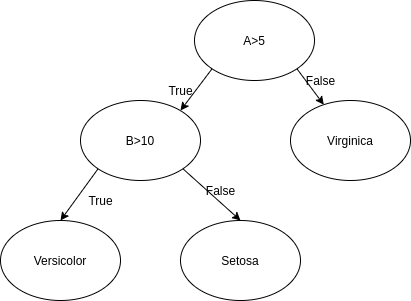
```
Is A>5?
True Branch
  Is B>10?
  True Branch
    Versicolor
  Is B>10?
  False Branch
    Setosa
Is A>5?
False Branch
	Virginica

```




4. Experiment with removing features that are redundant, highly correlated with other features and report accuracies of the resulting model. Explain your approach.

5. Report the advantages and disadvantages of decision trees based on the above question.

Answer: